In [1]:
import pandas as pd
import numpy as np
import orbit
import matplotlib.pyplot as plt

from orbit.utils.dataset import load_iclaims
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.utils.plot import get_orbit_style
plt.style.use(get_orbit_style())
from orbit.models import ETS

In [2]:
orbit.__version__

'1.1.0dev'

In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [4]:
# can also consider transform=False
raw_df = load_iclaims(transform=True)
raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [5]:
df = raw_df.copy()

In [6]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [7]:
test_size=52

train_df=df[:-test_size]
test_df=df[-test_size:]

In [8]:
ets = ETS(response_col='claims',
          date_col='week',
          seasonality=52,
          seed=2020,
          estimator='stan-mcmc',
)

In [9]:
ets.fit(train_df)

In [10]:
predicted_df = ets.predict(df=df, decompose=True)
predicted_df

,week,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95
0,2010-01-03,13.252285,13.386937,13.501121,12.910554,13.058104,13.159672,0.282143,0.334234,0.368833
1,2010-01-10,13.482625,13.634085,13.757013,12.918027,13.058844,13.169520,0.498599,0.569691,0.629751
2,2010-01-17,13.252041,13.376814,13.523543,12.952548,13.054610,13.197228,0.222827,0.325259,0.437286
3,2010-01-24,12.960536,13.147335,13.261642,12.913962,13.063039,13.167411,-0.013576,0.081246,0.170579
4,2010-01-31,13.052905,13.170454,13.297992,12.943654,13.073607,13.156410,0.028679,0.112575,0.194330
...,...,...,...,...,...,...,...,...,...,...
438,2018-05-27,12.132494,12.343902,12.542007,12.238470,12.439868,12.648526,-0.110801,-0.097931,-0.085594
439,2018-06-03,12.068915,12.277036,12.459194,12.240080,12.440463,12.630686,-0.183750,-0.167304,-0.146641
440,2018-06-10,12.160805,12.369468,12.566285,12.223410,12.441111,12.631588,-0.083333,-0.066103,-0.047514
441,2018-06-17,12.143369,12.324451,12.561445,12.243077,12.425464,12.655722,-0.114339,-0.096073,-0.077175


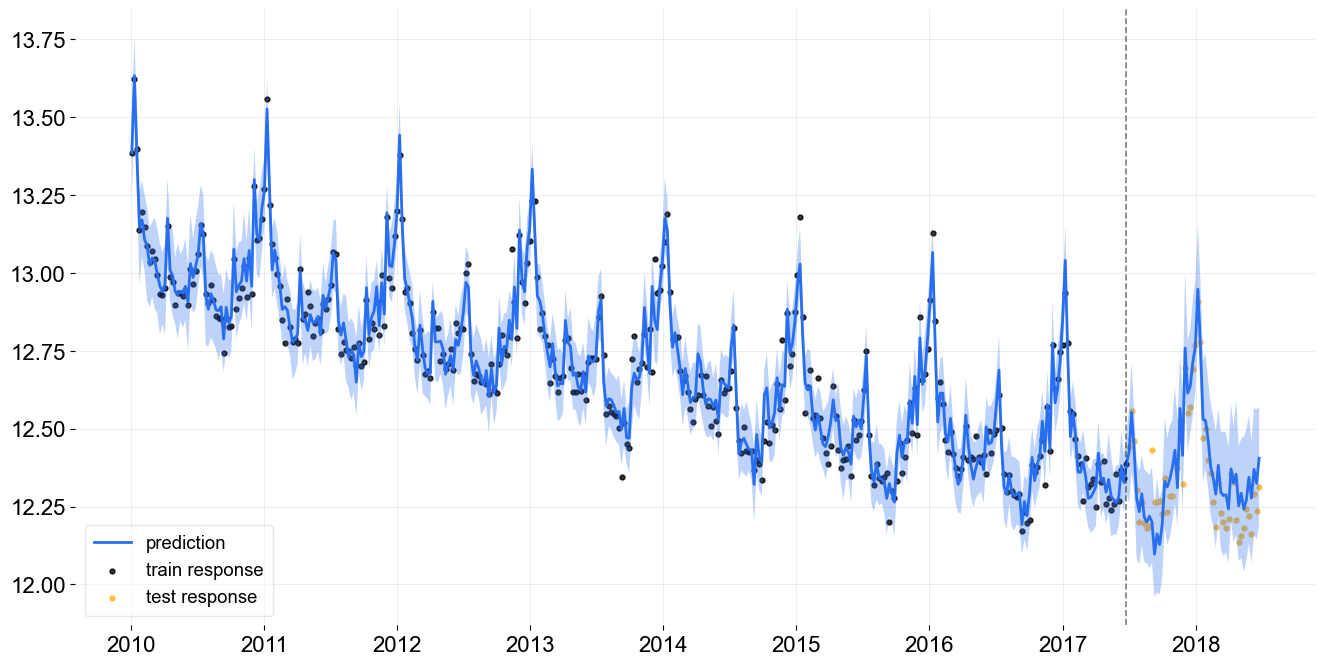

In [11]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col='week',
                        actual_col='claims',
                        test_actual_df=test_df)

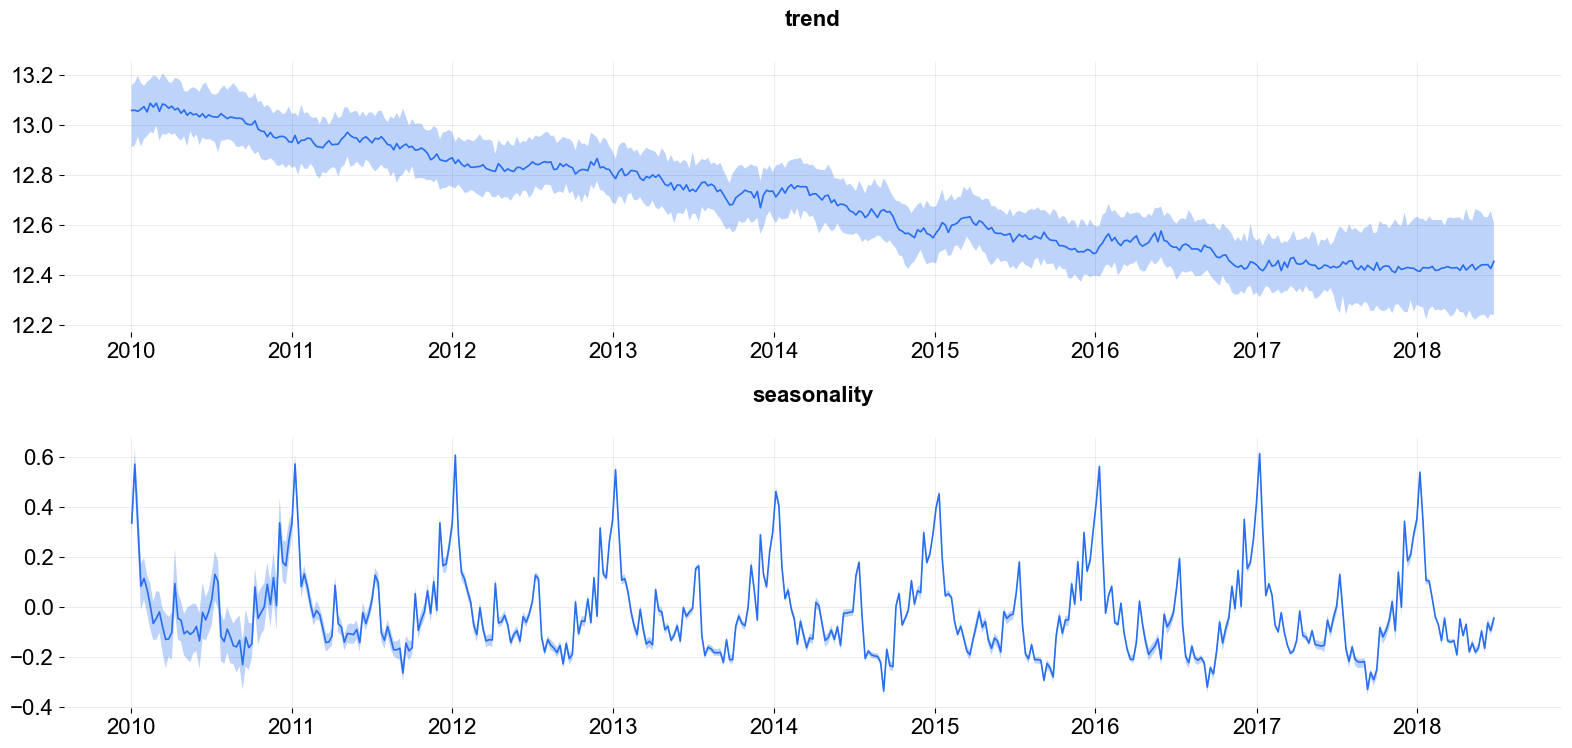

In [12]:
_ = plot_predicted_components(predicted_df=predicted_df, date_col='week')